<h1>ANUNCIOS DE AIRBNB NYC</h1>

<H2>PASO 1: Cargar datos de con Numpy y Pandas</H2>

In [3]:
#Descargamos el api
#!pip install kagglehub

In [4]:
!pip uninstall -y openpyxl
!pip install --no-cache-dir openpyxl==3.1.2

Found existing installation: openpyxl 3.1.2
Uninstalling openpyxl-3.1.2:
  Successfully uninstalled openpyxl-3.1.2
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.0 kB 330.3 kB/s eta 0:00:01
   ----------- --------------------------- 71.7/250.0 kB 438.9 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.0 kB 479.1 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/250.0 kB 532.5 kB/s eta 0:00:01
   -------------------------- ----------- 174.1/250.0 kB 553.5 kB/s eta 0:00:01
   ------------------------------- ------ 204.8/250.0 kB 593.2 kB/s eta 0:00:01
   ---------------------------------- --- 225.3/250.0 kB 551.4 kB/s eta 0:00:01
   -------------------------------------- 250.0/250.0 kB 569.5 kB/s eta 0:00:00


In [5]:
import openpyxl
print(openpyxl.__file__)  # Muestra la ruta del archivo openpyxl en uso
print(openpyxl.__version__)

C:\Users\psls2\anaconda3\Lib\site-packages\openpyxl\__init__.py
3.1.2


In [6]:
#import kagglehub
# Download latest version
#path = kagglehub.dataset_download("ebrahimelgazar/new-york-city-airbnb-market")

#print("Path to dataset files:", path)

In [7]:
#Declaramos  la ruta de dataframe
ruta= r"C:\Users\psls2\.cache\kagglehub\datasets\ebrahimelgazar\new-york-city-airbnb-market\versions\2"

In [8]:
import pandas as pd
import numpy as np
#Cargar datos
dfOpinion=pd.DataFrame(pd.read_csv(ruta+"\\"+"airbnb_last_review.csv"))
dfPrecio=pd.DataFrame(pd.read_csv(ruta+"\\"+"airbnb_price.csv"))
dfCuarto=pd.DataFrame(pd.read_excel(ruta+"\\"+"airbnb_room_type.xlsx", engine="openpyxl"))

<p>dfPrecio tiene los siguientes datos:</p>
<p>- listing_id: Id de anuncio
<br>- price: Precio
<br>- nbhood_full: Barrios de Nueva York </p>

In [10]:
dfPrecio

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"
...,...,...,...
25204,36425863,129 dollars,"Manhattan, Upper East Side"
25205,36427429,45 dollars,"Queens, Flushing"
25206,36438336,235 dollars,"Staten Island, Great Kills"
25207,36442252,100 dollars,"Bronx, Mott Haven"


<p>dfOpinion tiene los siguientes datos:</p>
<p>- listing_id: Id de anuncio
<br>- host_name: Nombre del que opina
<br>- last_review: última opinión </p>

In [12]:
dfOpinion

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019
...,...,...,...
25204,36425863,Rusaa,July 07 2019
25205,36427429,H Ai,July 07 2019
25206,36438336,Ben,July 07 2019
25207,36442252,Blaine,July 07 2019


<p>dfCuarto tiene los siguientes datos:</p>
<p>- listing_id: Id de anuncio
<br>- description: Descripción de la habitación
<br>- room_type: Tipo de habitación </p>

In [14]:
dfCuarto

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt
...,...,...,...
25204,36425863,Lovely Privet Bedroom with Privet Restroom,PRIVATE ROOM
25205,36427429,No.2 with queen size bed,PRIVATE ROOM
25206,36438336,Seas The Moment,Private room
25207,36442252,1B-1B apartment near by Metro,Entire home/apt


In [15]:
#Verificamos que las columnas tengan el mismo tipo de datos
print(dfCuarto.dtypes)
print(dfOpinion.dtypes)

listing_id      int64
description    object
room_type      object
dtype: object
 listing_id     int64
host_name      object
last_review    object
dtype: object


<p>Los tipos de datos coinciden, pero el nombre de la columna que tienen en común no coincide por un espacio el blanco. Esto nos puede causar un error al intentar fusinarlo</p>

In [17]:
#Eliminamos espacios en los nombres de las columnas
dfCuarto.columns = dfCuarto.columns.str.strip()
dfOpinion.columns=dfOpinion.columns.str.strip()
dfPrecio.columns=dfPrecio.columns.str.strip()

In [18]:
#Verificamos que las columnas tengan el mismo tipo de datos
print(dfCuarto.dtypes)
print(dfOpinion.dtypes)
print(dfPrecio.dtypes)

listing_id      int64
description    object
room_type      object
dtype: object
listing_id      int64
host_name      object
last_review    object
dtype: object
listing_id      int64
price          object
nbhood_full    object
dtype: object


<p>Hemos solucionado el problema</p>

In [20]:
dfTotal=pd.merge(dfCuarto,dfPrecio)
dfTotal=pd.merge(dfTotal,dfOpinion)
dfTotal

,listing_id,description,room_type,price,nbhood_full,host_name,last_review
0,2595,Skylit Midtown Castle,Entire home/apt,225 dollars,"Manhattan, Midtown",Jennifer,May 21 2019
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt,89 dollars,"Brooklyn, Clinton Hill",LisaRoxanne,July 05 2019
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200 dollars,"Manhattan, Murray Hill",Chris,June 22 2019
3,5178,Large Furnished Room Near B'way,private room,79 dollars,"Manhattan, Hell's Kitchen",Shunichi,June 24 2019
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150 dollars,"Manhattan, Chinatown",Ben,June 09 2019
...,...,...,...,...,...,...,...
25204,36425863,Lovely Privet Bedroom with Privet Restroom,PRIVATE ROOM,129 dollars,"Manhattan, Upper East Side",Rusaa,July 07 2019
25205,36427429,No.2 with queen size bed,PRIVATE ROOM,45 dollars,"Queens, Flushing",H Ai,July 07 2019
25206,36438336,Seas The Moment,Private room,235 dollars,"Staten Island, Great Kills",Ben,July 07 2019
25207,36442252,1B-1B apartment near by Metro,Entire home/apt,100 dollars,"Bronx, Mott Haven",Blaine,July 07 2019


In [21]:
# Revisar estructura y tipos de datos
print(dfTotal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
 3   price        25209 non-null  object
 4   nbhood_full  25209 non-null  object
 5   host_name    25201 non-null  object
 6   last_review  25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None


<h2>PASO 2: Limpieza de datos</h2>

In [23]:
dfTotal.fillna('Sin descripción')
print(dfTotal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
 3   price        25209 non-null  object
 4   nbhood_full  25209 non-null  object
 5   host_name    25201 non-null  object
 6   last_review  25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None


In [24]:
dfTotal.isnull().sum()

listing_id      0
description    10
room_type       0
price           0
nbhood_full     0
host_name       8
last_review     0
dtype: int64

In [25]:
#Rellenamos los valores nulos de description
dfTotal['description']=dfTotal['description'].fillna('Sin descripción')
dfTotal.isnull().sum()

listing_id     0
description    0
room_type      0
price          0
nbhood_full    0
host_name      8
last_review    0
dtype: int64

In [26]:
#Rellenamos los valores nulos de host_name
dfTotal['host_name']=dfTotal['host_name'].fillna('Anónimo')
dfTotal.isnull().sum()

listing_id     0
description    0
room_type      0
price          0
nbhood_full    0
host_name      0
last_review    0
dtype: int64

<p>host_name, last_review, listing_id y description van a ser de poca utilidad en este caso, así que eliminaremos del dataframe </p>


In [28]:
dfTotal=dfTotal.drop("host_name",axis=1)
dfTotal=dfTotal.drop("last_review",axis=1)
dfTotal=dfTotal.drop("listing_id",axis=1)
dfTotal=dfTotal.drop("description",axis=1)
dfTotal

,room_type,price,nbhood_full
0,Entire home/apt,225 dollars,"Manhattan, Midtown"
1,Entire home/apt,89 dollars,"Brooklyn, Clinton Hill"
2,Entire home/apt,200 dollars,"Manhattan, Murray Hill"
3,private room,79 dollars,"Manhattan, Hell's Kitchen"
4,Entire home/apt,150 dollars,"Manhattan, Chinatown"
...,...,...,...
25204,PRIVATE ROOM,129 dollars,"Manhattan, Upper East Side"
25205,PRIVATE ROOM,45 dollars,"Queens, Flushing"
25206,Private room,235 dollars,"Staten Island, Great Kills"
25207,Entire home/apt,100 dollars,"Bronx, Mott Haven"


<p>Debemos fijarnos que el precio no está como tipo float o int</p>

In [30]:
dfTotal['price']=dfTotal['price'].str.replace(r'[^0-9.]','',regex=True).astype(float)
dfTotal

,room_type,price,nbhood_full
0,Entire home/apt,225.0,"Manhattan, Midtown"
1,Entire home/apt,89.0,"Brooklyn, Clinton Hill"
2,Entire home/apt,200.0,"Manhattan, Murray Hill"
3,private room,79.0,"Manhattan, Hell's Kitchen"
4,Entire home/apt,150.0,"Manhattan, Chinatown"
...,...,...,...
25204,PRIVATE ROOM,129.0,"Manhattan, Upper East Side"
25205,PRIVATE ROOM,45.0,"Queens, Flushing"
25206,Private room,235.0,"Staten Island, Great Kills"
25207,Entire home/apt,100.0,"Bronx, Mott Haven"


In [31]:
dfTotal['nbhood_full'].unique()

array(['Manhattan, Midtown', 'Brooklyn, Clinton Hill',
       'Manhattan, Murray Hill', "Manhattan, Hell's Kitchen",
       'Manhattan, Chinatown', 'Manhattan, Upper West Side',
       'Brooklyn, South Slope', 'Brooklyn, Williamsburg',
       'Brooklyn, Fort Greene', 'Manhattan, Chelsea',
       'Brooklyn, Crown Heights', 'Brooklyn, Park Slope',
       'Brooklyn, Bedford-Stuyvesant', 'Brooklyn, Windsor Terrace',
       'Manhattan, Inwood', 'Manhattan, East Village',
       'Manhattan, Harlem', 'Brooklyn, Greenpoint', 'Brooklyn, Bushwick',
       'Manhattan, Lower East Side',
       'Brooklyn, Prospect-Lefferts Gardens', 'Queens, Long Island City',
       'Manhattan, Kips Bay', 'Manhattan, SoHo',
       'Manhattan, Upper East Side', 'Brooklyn, Prospect Heights',
       'Manhattan, East Harlem', 'Manhattan, Washington Heights',
       'Queens, Woodside', 'Brooklyn, Flatbush',
       'Brooklyn, Carroll Gardens', 'Manhattan, West Village',
       'Brooklyn, Flatlands', 'Queens, Sunnyside',

<p>Y aquí, aunque vemos que cada una de las categorías son diferentes, no estaría mal separar el distrito del barrio para un mejor análisis</p>

In [33]:
# Separar la columna en 'district' y 'neighborhood'
dfTotal[['district', 'neighborhood']] = dfTotal['nbhood_full'].str.split(',', n=1, expand=True)

# Eliminar espacios extra
dfTotal['district'] = dfTotal['district'].str.strip()
dfTotal['neighborhood'] = dfTotal['neighborhood'].str.strip()

dfTotal

,room_type,price,nbhood_full,district,neighborhood
0,Entire home/apt,225.0,"Manhattan, Midtown",Manhattan,Midtown
1,Entire home/apt,89.0,"Brooklyn, Clinton Hill",Brooklyn,Clinton Hill
2,Entire home/apt,200.0,"Manhattan, Murray Hill",Manhattan,Murray Hill
3,private room,79.0,"Manhattan, Hell's Kitchen",Manhattan,Hell's Kitchen
4,Entire home/apt,150.0,"Manhattan, Chinatown",Manhattan,Chinatown
...,...,...,...,...,...
25204,PRIVATE ROOM,129.0,"Manhattan, Upper East Side",Manhattan,Upper East Side
25205,PRIVATE ROOM,45.0,"Queens, Flushing",Queens,Flushing
25206,Private room,235.0,"Staten Island, Great Kills",Staten Island,Great Kills
25207,Entire home/apt,100.0,"Bronx, Mott Haven",Bronx,Mott Haven


<h2>PASO 3:Exploración de precios</h2>

In [35]:
dfTotal.groupby('room_type')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
ENTIRE HOME/APT,2143.0,199.578161,159.107943,16.0,120.0,155.0,225.0,3000.0
Entire home/apt,8458.0,196.962402,173.336138,10.0,119.0,159.0,225.0,5100.0
PRIVATE ROOM,1867.0,82.192287,80.879046,0.0,50.0,69.0,95.0,2000.0
Private room,7241.0,81.887585,102.789930,0.0,52.0,70.0,92.0,7500.0
SHARED ROOM,97.0,54.608247,41.587397,15.0,31.0,44.0,69.0,350.0
Shared room,380.0,52.900000,49.683808,0.0,30.0,40.0,65.0,800.0
entire home/apt,2665.0,195.875797,145.408803,10.0,120.0,160.0,225.0,2990.0
private room,2248.0,80.374555,53.230129,0.0,52.0,69.0,95.0,999.0
shared room,110.0,54.409091,33.387713,18.0,34.0,41.0,65.0,250.0


<p>Nos damos cuenta que hay categorías que se repiten y lo toma como una categoría diferente debido a las mayúsculas y minúculas</p>

In [37]:
dfTotal['room_type']=dfTotal['room_type'].str.strip().str.lower()

dfTotal.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
entire home/apt,13266.0,197.166667,165.803090,10.0,120.0,159.0,225.0,5100.0
private room,11356.0,81.638165,91.503336,0.0,51.0,70.0,94.0,7500.0
shared room,587.0,53.465077,45.692249,0.0,30.0,41.0,65.0,800.0


<p>Aquí observamos estadísticas generales de la relación entre tipos de habitaciones y los precios de anuncios</p>
<p>Recordemos que son los precios en anuncios y en la categoría de "private room" y "shared room" tenemos anuncios que costaron 0 dólares</p>

In [39]:
dfcero=dfTotal[dfTotal['price']==0]
dfcero

,room_type,price,nbhood_full,district,neighborhood
10861,private room,0.0,"Bronx, East Morrisania",Bronx,East Morrisania
10958,private room,0.0,"Brooklyn, Bushwick",Brooklyn,Bushwick
11023,private room,0.0,"Brooklyn, Bedford-Stuyvesant",Brooklyn,Bedford-Stuyvesant
11024,private room,0.0,"Brooklyn, Bedford-Stuyvesant",Brooklyn,Bedford-Stuyvesant
11025,private room,0.0,"Brooklyn, Bedford-Stuyvesant",Brooklyn,Bedford-Stuyvesant
11577,shared room,0.0,"Brooklyn, Bushwick",Brooklyn,Bushwick
11589,shared room,0.0,"Brooklyn, Bushwick",Brooklyn,Bushwick


<p>Hagamos la relación entre tipo de habitación y distrito</p>

In [41]:
dfTotal.groupby('district')['room_type'].count().reset_index().query("room_type == room_type.max()")


,district,room_type
1,Brooklyn,10466


<p>Este es el distrito que ha tenido más anuncios: Brooklyn</p>

In [43]:
dfTotal.groupby('district')['room_type'].count()

district
Bronx              698
Brooklyn         10466
Manhattan        10322
Queens            3456
Staten Island      267
Name: room_type, dtype: int64

<p>Y Staten Island solo hubo 267 anuncios</p>

<p>¿Cuántos anuncios hubo por barrio en Brooklyn?</p>

In [46]:
brooklyn=dfTotal[dfTotal['district']=='Brooklyn'] 
brooklyn.pivot_table('price','neighborhood', aggfunc=['mean', 'min', 'max', 'count'])

,mean,min,max,count
,price,price,price,price
neighborhood,,,,
Bath Beach,84.000000,33.0,180.0,13
Bay Ridge,115.192771,18.0,800.0,83
Bedford-Stuyvesant,104.632413,0.0,1067.0,2209
Bensonhurst,76.309524,25.0,145.0,42
Bergen Beach,106.000000,49.0,235.0,6
Boerum Hill,166.487500,50.0,550.0,80
Borough Park,64.947368,20.0,300.0,95
Brighton Beach,87.702128,30.0,275.0,47


<p>Ahí tenemos la información de los anuncios en el distrito de Brooklyn</p>

In [48]:
pivot_result = brooklyn.pivot_table(values='price', index='neighborhood', aggfunc=['max', 'count'])

# Obtener el barrio con el precio más alto
max_price_nb = pivot_result[pivot_result[('max', 'price')] == pivot_result[('max', 'price')].max()]

# Obtener el barrio con el mayor conteo
max_count_nb = pivot_result[pivot_result[('count', 'price')] == pivot_result[('count', 'price')].max()]

# Unir ambos resultados asegurando que no haya duplicados
result = pd.concat([max_price_nb, max_count_nb]).drop_duplicates()
result


,max,count
,price,price
neighborhood,,
East Flatbush,7500.0,323
Bedford-Stuyvesant,1067.0,2209


<p>Entoces vemos que en East Flatbush se pago el anuncio más caro del distrito</p>
<p>En Bedford-Stuyvesant hubo mayor cantidad de anuncios del distrito</p>

<H2>PASO 4: Visualización de datos]</H2>

In [51]:
%matplotlib inline


In [52]:
pip install seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#Recojemos la cantidad de anuncios en cada distrito
dfAnunDist=dfTotal['district'].value_counts().reset_index()
dfAnunDist

,district,count
0,Brooklyn,10466
1,Manhattan,10322
2,Queens,3456
3,Bronx,698
4,Staten Island,267


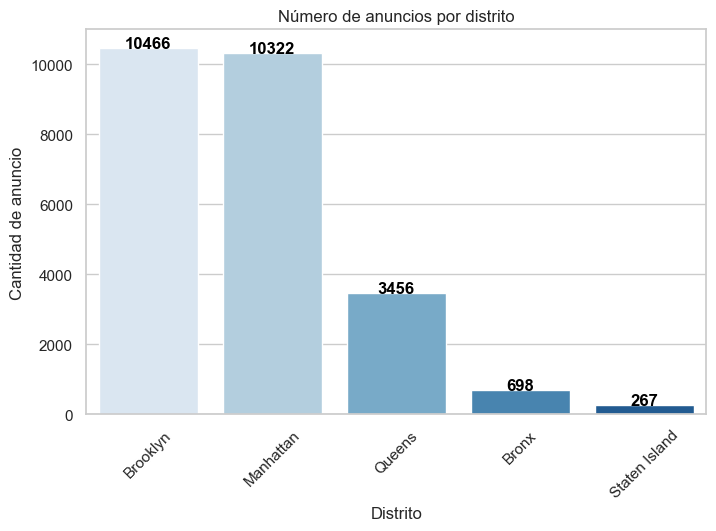

In [55]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
ax=sns.barplot(data=dfAnunDist,x='district', y='count',palette='Blues')


for i, v in enumerate(dfAnunDist['count']):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=12, fontweight='bold', color='black')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de anuncio')
plt.title('Número de anuncios por distrito')
plt.xticks(rotation=45)
plt.show()


<p>Vemos que hay una ligera ventaja de cantidad de anuncios de Brooklyn que en Manhattan</p>
<p>Y Staten Island tiene la menor cantidad de anuncios</p>

In [57]:
#Ahora obtendremos la cantidad de anuncios por tipo de habitación
dfAnunHabi=dfTotal['room_type'].value_counts().reset_index()
dfAnunHabi

,room_type,count
0,entire home/apt,13266
1,private room,11356
2,shared room,587


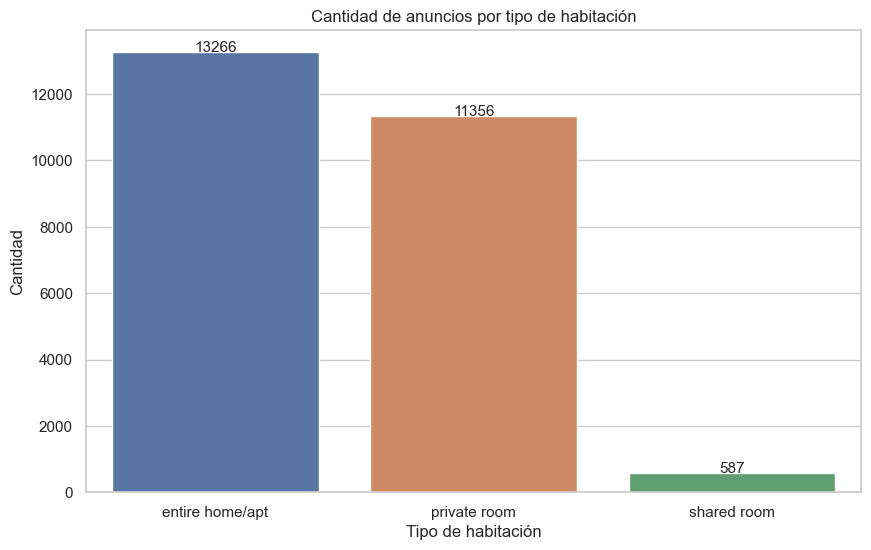

In [58]:
sns.set(style='whitegrid')

plt.figure(figsize=(10,6))
ax=sns.barplot(data=dfAnunHabi,x='room_type',y='count')

for i,v in enumerate(dfAnunHabi['count']):
    ax.text(i,v+1,str(v),ha='center',fontsize=11)

plt.xlabel('Tipo de habitación')
plt.ylabel('Cantidad')
plt.title('Cantidad de anuncios por tipo de habitación')
plt.show()

<P>Observamos una gran diferencia entre el tipo de shared room a comparación de la cantidad de anuncios en los otros tipos de habitación</P>

In [60]:
#Obtendremos los barrios con más de x anuncios
cantAnuncios=200
dfAnunBarr=dfTotal['neighborhood'].value_counts()[dfTotal['neighborhood'].value_counts()>cantAnuncios].reset_index()
dfAnunBarr

,neighborhood,count
0,Bedford-Stuyvesant,2209
1,Williamsburg,1853
2,Harlem,1435
3,Bushwick,1202
4,Hell's Kitchen,1119
5,East Village,866
6,Upper East Side,839
7,Upper West Side,775
8,Crown Heights,752
9,East Harlem,672


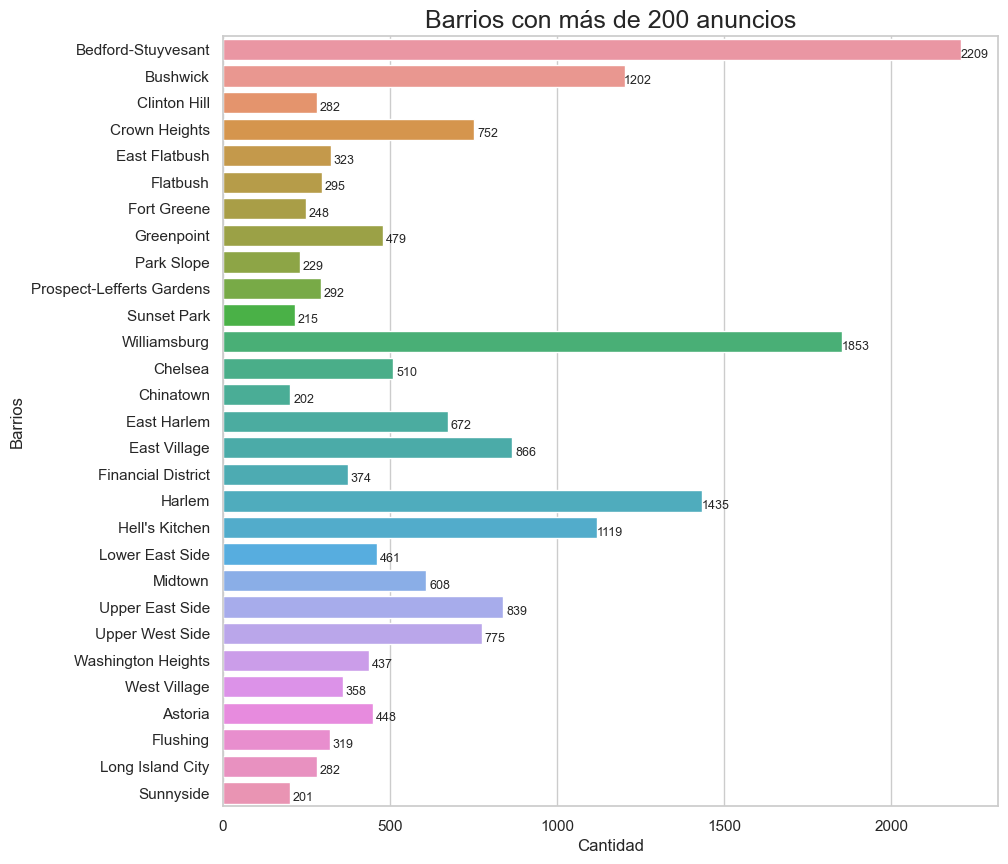

In [305]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,10))
ax=sns.barplot(data=dfAnunBarr, x='count', y='neighborhood')

for i, v in enumerate(dfAnunBarr['count']):
    ax.text(v+40,i+0.3,str(v),ha='center',fontsize=9)
plt.xlabel('Cantidad')
plt.ylabel('Barrios')
plt.title(f'Barrios con más de {cantAnuncios} anuncios',fontsize=18)
plt.show()


<p>A través de este gráfico se muestra un gráfico de los barrios que tuvieron más de 200 anuncios</p>

In [134]:
cantAnuncios = 200

dfAnunBarrDist=(
    dfTotal.groupby(['district','neighborhood'])
    .size()
    .reset_index(name='count')
    .query("count>@cantAnuncios")
)
dfAnunBarrDist

,district,neighborhood,count
50,Brooklyn,Bedford-Stuyvesant,2209
58,Brooklyn,Bushwick,1202
61,Brooklyn,Clinton Hill,282
65,Brooklyn,Crown Heights,752
70,Brooklyn,East Flatbush,323
72,Brooklyn,Flatbush,295
74,Brooklyn,Fort Greene,248
78,Brooklyn,Greenpoint,479
84,Brooklyn,Park Slope,229
86,Brooklyn,Prospect-Lefferts Gardens,292


C:\Users\psls2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


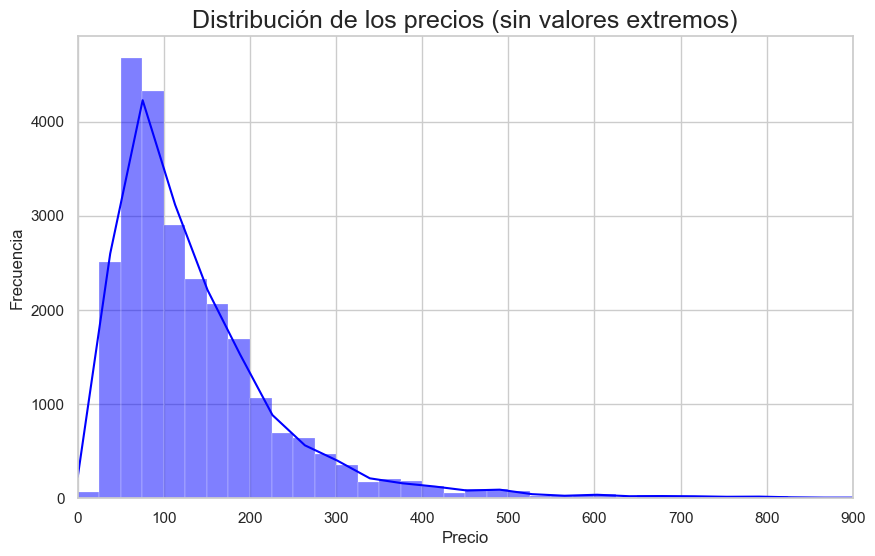

In [247]:
max_price = np.percentile(dfTotal['price'], 99.6)  # Limita al percentil 99

plt.figure(figsize=(10,6))
sns.histplot(dfTotal['price'], bins=300, kde=True, color='blue')

# Limitar el eje X para excluir valores atípicos extremos
plt.xlim(0, max_price)

plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de los precios (sin valores extremos)', fontsize=18)
plt.show()

<p>Calculamos el percentil 99.6 de los precios. Esto significa que excluimos el 0.04% de los valores más altos, lo que evita que pocos valores extremos (outliers) distorsionen el gráfico.</p>

In [277]:
dfPreciosBarrios=dfTotal.groupby('neighborhood')['price'].mean().round(0).reset_index(name='price_mean')
top_caros=dfPreciosBarrios.sort_values(by='price_mean',ascending=False).head(10)
top_baratos=dfPreciosBarrios.sort_values(by='price_mean',ascending=True).head(10)

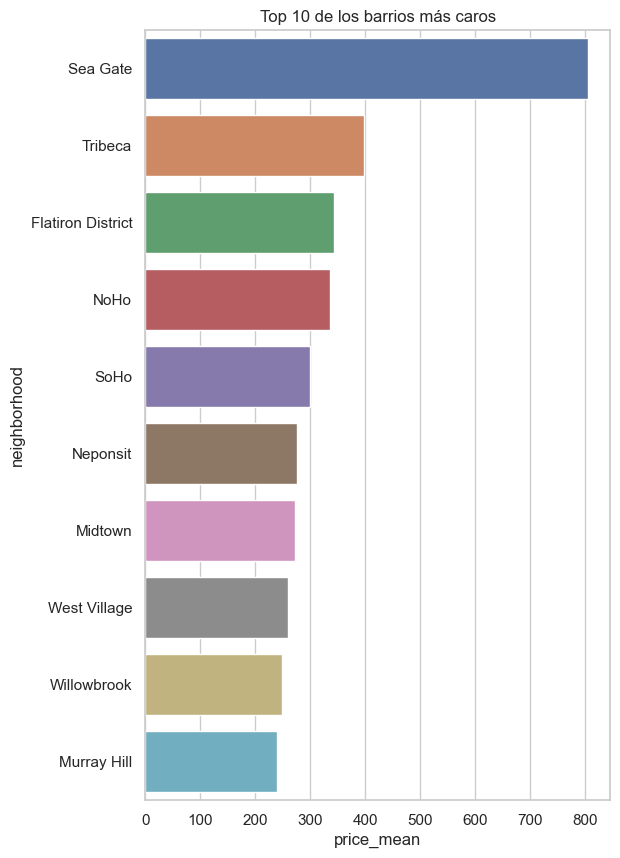

In [284]:
plt.figure(figsize=(6,10))
sns.barplot(data=top_caros,x='price_mean',y='neighborhood')
plt.title('Top 10 de los barrios más caros')
plt.show()


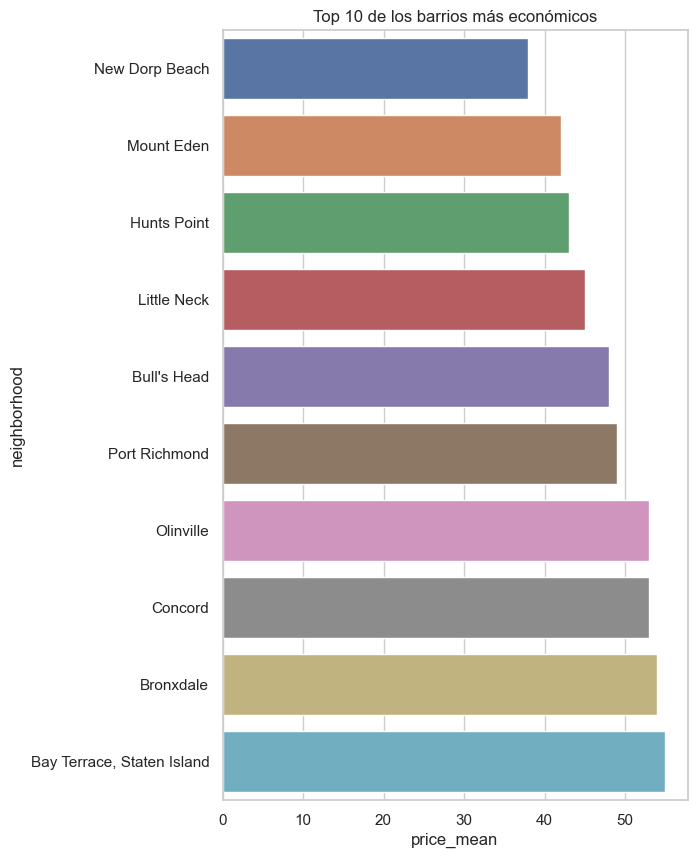

In [282]:
plt.figure(figsize=(6,10))
sns.barplot(data=top_baratos,x='price_mean',y='neighborhood')
plt.title('Top 10 de los barrios más económicos')
plt.show()


<p>Entonces Sea Gate en el barrio más caro y New Dorp Beach es el más barato</p>

In [286]:
dfPreciosHabi=dfTotal.groupby('room_type')['price'].mean().round(0).reset_index(name='price_mean')
dfPreciosHabi

,room_type,price_mean
0,entire home/apt,197.0
1,private room,82.0
2,shared room,53.0


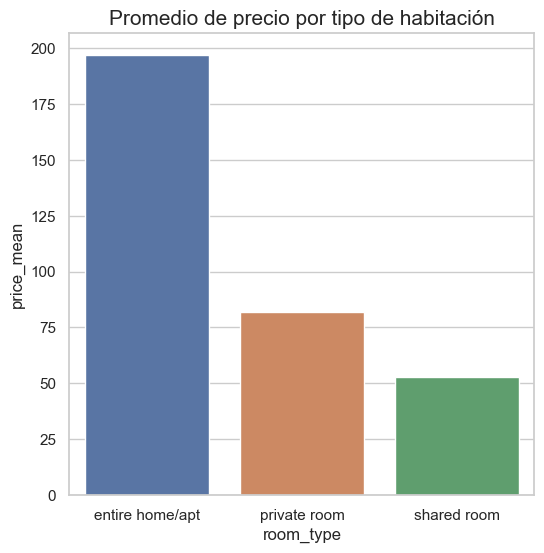

In [311]:
plt.figure(figsize=(6,6))
sns.barplot(data=dfPreciosHabi,x='room_type',y='price_mean')
plt.title('Promedio de precio por tipo de habitación', fontsize=15)
plt.show()

<p>Entonces el tipo entire home/apt es el tipo de habitaci</p>

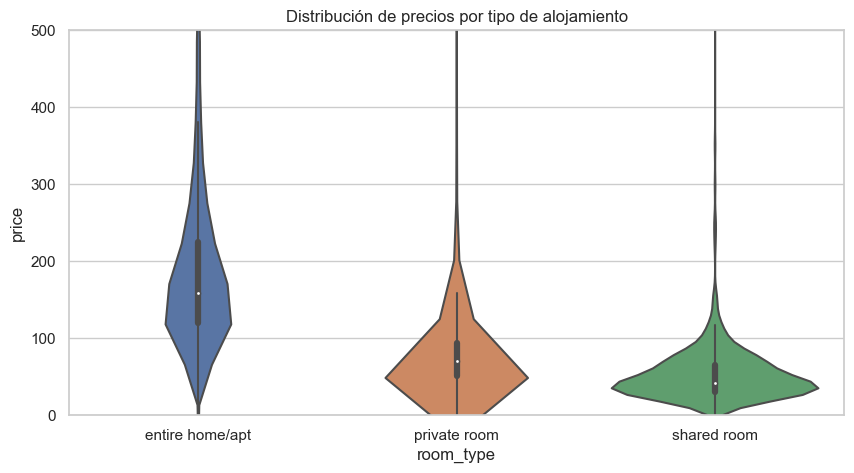

In [293]:
plt.figure(figsize=(10,5))
sns.violinplot(x='room_type', y='price', data=dfTotal)
plt.ylim(0, 500)
plt.title('Distribución de precios por tipo de alojamiento')
plt.show()

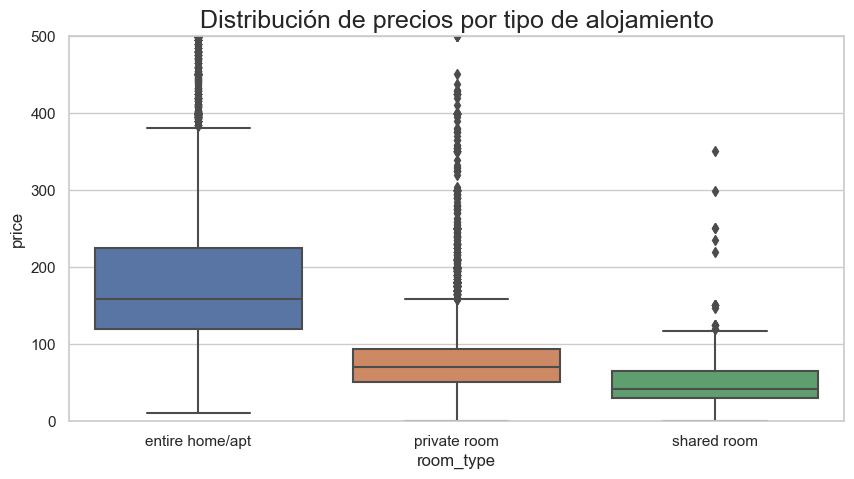

In [303]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='room_type', y='price', data=dfTotal)
plt.ylim(0, 500)  # Limitar eje Y para excluir valores extremos
plt.title('Distribución de precios por tipo de alojamiento',fontsize=18)
plt.show()




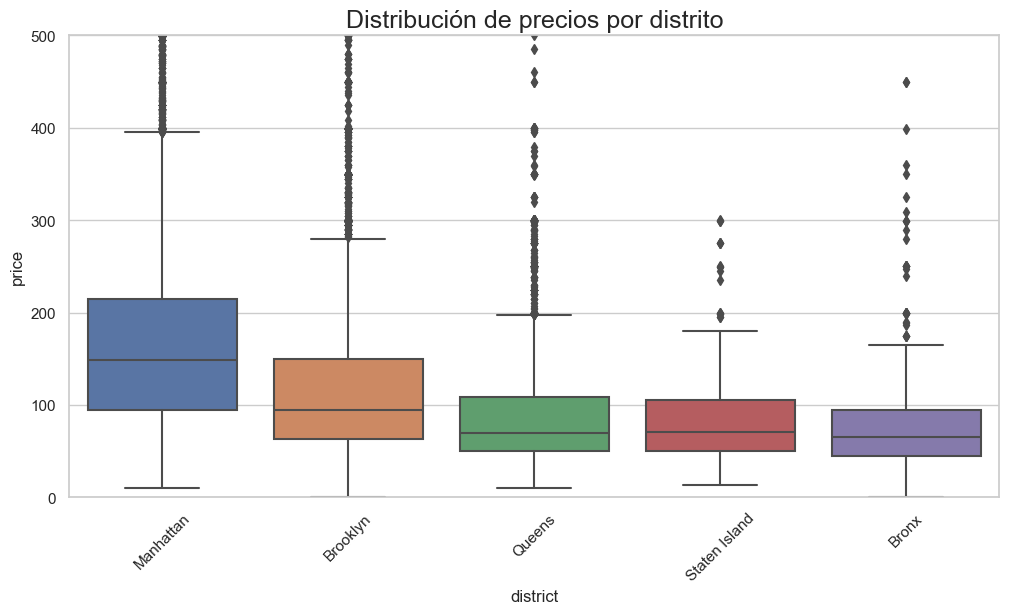

In [301]:
plt.figure(figsize=(12,6))
sns.boxplot(x='district', y='price', data=dfTotal)
plt.xticks(rotation=45)
plt.ylim(0, 500)  
plt.title('Distribución de precios por distrito',fontsize=18)
plt.show()